<a href="https://colab.research.google.com/github/TCCUFABC/deltamap/blob/main/criacao_bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Teste de atualização no GitHub a partir do Google Colab!")


Teste de atualização no GitHub a partir do Google Colab!


In [ ]:
# Instalar PostgreSQL e PostGIS
!apt-get install postgresql postgis -y

# Iniciar o serviço do PostgreSQL
!service postgresql start

# Criar um banco de dados para o projeto
!sudo -u postgres createdb deltadb

# Ativar a extensão PostGIS
!sudo -u postgres psql -d deltadb -c "CREATE EXTENSION postgis;"

print("Banco de dados 'deltadb' criado e PostGIS ativado com sucesso!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcommon-sense-perl libgmpxx4ldbl libjson-perl libjson-xs-perl libprotobuf-c1 libsfcgal1
  libtypes-serialiser-perl logrotate netbase postgis-doc postgresql-14 postgresql-14-postgis-3
  postgresql-14-postgis-3-scripts postgresql-client-14 postgresql-client-common postgresql-common
  postgresql-postgis postgresql-postgis-scripts ssl-cert sysstat
Suggested packages:
  bsd-mailx | mailx postgresql-doc postgresql-doc-14 isag
The following NEW packages will be installed:
  libcommon-sense-perl libgmpxx4ldbl libjson-perl libjson-xs-perl libprotobuf-c1 libsfcgal1
  libtypes-serialiser-perl logrotate netbase postgis postgis-doc postgresql postgresql-14
  postgresql-14-postgis-3 postgresql-14-postgis-3-scripts postgresql-client-14
  postgresql-client-common postgresql-common postgresql-postgis postgresql-postgis-scripts ssl-cert
  sysstat
0 upg

In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Testar a conexão imprimindo a versão do banco
cur.execute("SELECT version();")
db_version = cur.fetchone()
print("Banco de dados conectado com sucesso!")
print("Versão do PostgreSQL:", db_version[0])

cur.close()
conn.close()


OperationalError: connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "postgres"
connection to server at "localhost" (127.0.0.1), port 5432 failed: FATAL:  password authentication failed for user "postgres"


In [ ]:
# Definir a senha correta para o usuário postgres
!sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'postgres';"

print("Senha do usuário 'postgres' definida com sucesso!")


ALTER ROLE
Senha do usuário 'postgres' definida com sucesso!


In [ ]:
import psycopg2

# Tentar conectar ao banco de dados após definir a senha
try:
    conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
    cur = conn.cursor()

    cur.execute("SELECT version();")
    db_version = cur.fetchone()
    print("Banco de dados conectado com sucesso!")
    print("Versão do PostgreSQL:", db_version[0])

    cur.close()
    conn.close()
except Exception as e:
    print("Erro ao conectar:", e)


Banco de dados conectado com sucesso!
Versão do PostgreSQL: PostgreSQL 14.15 (Ubuntu 14.15-0ubuntu0.22.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0, 64-bit


In [ ]:
# Instalar as bibliotecas necessárias
!apt-get install -y postgis gdal-bin python3-gdal
!pip install geopandas



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
postgis is already the newest version (3.4.0+dfsg-3~jammy0).
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 2s (2,586 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 128032 files and directories currently inst

In [ ]:
# Instalar PostgreSQL, PostGIS e GDAL (para manipulação de arquivos espaciais)
!apt-get install -y postgresql postgis gdal-bin python3-gdal

# Instalar bibliotecas Python necessárias
!pip install geopandas psycopg2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
postgresql is already the newest version (14+238).
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
postgis is already the newest version (3.4.0+dfsg-3~jammy0).
python3-gdal is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!wget -P /content/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.shp
!wget -P /content/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.dbf
!wget -P /content/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.shx
!wget -P /content/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.prj


--2025-02-16 22:50:25--  https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236 [application/octet-stream]
Saving to: ‘/content/area_de_estudo.shp’

area_de_estudo.shp  100%[===================>]     236  --.-KB/s    in 0s      

2025-02-16 22:50:25 (3.97 MB/s) - ‘/content/area_de_estudo.shp’ saved [236/236]

--2025-02-16 22:50:25--  https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/area_de_estudo.dbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [ ]:
# Iniciar o PostgreSQL no ambiente do Colab
!service postgresql start

# Criar um banco de dados para o projeto
!sudo -u postgres createdb deltadb

# Ativar a extensão PostGIS no banco de dados
!sudo -u postgres psql -d deltadb -c "CREATE EXTENSION postgis;"

print("Banco de dados 'deltadb' criado e PostGIS ativado com sucesso!")


 * Starting PostgreSQL 14 database server
   ...done.
createdb: error: database creation failed: ERROR:  database "deltadb" already exists
ERROR:  extension "postgis" already exists
Banco de dados 'deltadb' criado e PostGIS ativado com sucesso!


In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Criar uma tabela para armazenar os dados da área de estudo
cur.execute("""
    CREATE TABLE area_estudo (
        id SERIAL PRIMARY KEY,
        nome VARCHAR(100),
        geom GEOMETRY(MULTIPOLYGON, 4326)
    );
""")

conn.commit()
cur.close()
conn.close()

print("Tabela 'area_estudo' criada com sucesso!")


Tabela 'area_estudo' criada com sucesso!


In [ ]:
# Importar o shapefile para o banco de dados
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/area_de_estudo.shp" -nln area_estudo -overwrite -progress


0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
# Conectar ao banco e contar os registros na tabela
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar o número de registros na tabela
cur.execute("SELECT COUNT(*) FROM area_estudo;")
num_registros = cur.fetchone()[0]

print(f"Número de registros na tabela 'area_estudo': {num_registros}")

cur.close()
conn.close()


Número de registros na tabela 'area_estudo': 1


In [ ]:
# Conectar ao banco e visualizar algumas informações
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Selecionar os primeiros registros da tabela
cur.execute("SELECT id, nome, ST_AsText(geom) FROM area_estudo LIMIT 5;")
dados = cur.fetchall()

# Mostrar os dados importados
for linha in dados:
    print(linha)

cur.close()
conn.close()


UndefinedColumn: column "nome" does not exist
LINE 1: SELECT id, nome, ST_AsText(geom) FROM area_estudo LIMIT 5;
                   ^


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar a estrutura da tabela
cur.execute("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'area_estudo';
""")

colunas = cur.fetchall()

print("Estrutura da tabela 'area_estudo':")
for coluna in colunas:
    print(f"- {coluna[0]} ({coluna[1]})")

cur.close()
conn.close()


Estrutura da tabela 'area_estudo':
- ogc_fid (integer)
- id (numeric)
- wkb_geometry (USER-DEFINED)


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Adicionar a coluna 'nome' à tabela
cur.execute("ALTER TABLE area_estudo ADD COLUMN nome VARCHAR(255);")

conn.commit()
cur.close()
conn.close()

print("Coluna 'nome' adicionada com sucesso!")


Coluna 'nome' adicionada com sucesso!


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Atualizar a coluna 'nome' com um valor padrão
cur.execute("UPDATE area_estudo SET nome = 'Área de Estudo - Delta Norte';")

conn.commit()
cur.close()
conn.close()

print("Dados da coluna 'nome' preenchidos com sucesso!")


Dados da coluna 'nome' preenchidos com sucesso!


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Ajustar a consulta SQL para usar 'wkb_geometry' no lugar de 'geom'
cur.execute("SELECT ogc_fid, nome, ST_AsText(wkb_geometry) FROM area_estudo LIMIT 5;")
dados = cur.fetchall()

# Exibir os dados
for linha in dados:
    print(linha)

cur.close()
conn.close()


(1, 'Área de Estudo - Delta Norte', 'POLYGON((-51.583460350789494 1.044482967127976,-48.53084275009064 1.054901457232745,-48.50385077760802 -0.549161147665245,-51.57829640387763 -0.564086495903382,-51.583460350789494 1.044482967127976))')


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área total convertendo para metros (EPSG:3857) e transformando para km²
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(wkb_geometry, 3857))) / 1000000
    FROM area_estudo;
""")

area_total_km2 = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Área total da área de estudo: {area_total_km2:.2f} km²")


Área total da área de estudo: 60986.26 km²


In [ ]:
# Criar a pasta para armazenar os arquivos
!mkdir -p /content/data

# Baixar os arquivos do GitHub
!wget -P /content/data/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.shp
!wget -P /content/data/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.dbf
!wget -P /content/data/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.shx
!wget -P /content/data/ https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.prj


--2025-02-16 23:24:56--  https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20529684 (20M) [application/octet-stream]
Saving to: ‘/content/data/conservation_units_amazon_biome.shp’

conservation_units_ 100%[===================>]  19.58M  --.-KB/s    in 0.1s    

2025-02-16 23:24:57 (179 MB/s) - ‘/content/data/conservation_units_amazon_biome.shp’ saved [20529684/20529684]

--2025-02-16 23:24:57--  https://raw.githubusercontent.com/TCCUFABC/deltamap/main/data/conservation_units_amazon_biome.dbf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Criar a tabela para armazenar as Unidades de Conservação
cur.execute("""
    CREATE TABLE conservation_units (
        id SERIAL PRIMARY KEY,
        nome VARCHAR(255),
        categoria VARCHAR(255),
        geom GEOMETRY(MULTIPOLYGON, 4326)
    );
""")

conn.commit()
cur.close()
conn.close()

print("Tabela 'conservation_units' criada com sucesso!")


Tabela 'conservation_units' criada com sucesso!


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar quantos registros existem na tabela
cur.execute("SELECT COUNT(*) FROM conservation_units;")
num_registros = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Número de registros na tabela 'conservation_units': {num_registros}")


Número de registros na tabela 'conservation_units': 0


In [ ]:
!ls /content/data/


conservation_units_amazon_biome.dbf  conservation_units_amazon_biome.shp
conservation_units_amazon_biome.prj  conservation_units_amazon_biome.shx


In [ ]:
!ogrinfo -al -so /content/data/conservation_units_amazon_biome.shp


INFO: Open of `/content/data/conservation_units_amazon_biome.shp'
      using driver `ESRI Shapefile' successful.

Layer name: conservation_units_amazon_biome
Geometry: Polygon
Feature Count: 304
Extent: (-73.983182, -16.109512) - (-43.399318, 5.269581)
Layer SRS WKT:
BOUNDCRS[
    SOURCECRS[
        GEOGCRS["SIRGAS 2000",
            DATUM["Sistema de Referencia Geocentrico para las AmericaS 2000",
                ELLIPSOID["GRS 1980",6378137,298.257222101,
                    LENGTHUNIT["metre",1]]],
            PRIMEM["Greenwich",0,
                ANGLEUNIT["degree",0.0174532925199433]],
            CS[ellipsoidal,2],
                AXIS["geodetic latitude (Lat)",north,
                    ORDER[1],
                    ANGLEUNIT["degree",0.0174532925199433]],
                AXIS["geodetic longitude (Lon)",east,
                    ORDER[2],
                    ANGLEUNIT["degree",0.0174532925199433]],
            USAGE[
                SCOPE["Horizontal component of 3D system."],


In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Remover a tabela existente
cur.execute("DROP TABLE IF EXISTS conservation_units;")
conn.commit()

cur.close()
conn.close()

print("Tabela 'conservation_units' removida!")


Tabela 'conservation_units' removida!


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Criar a tabela para armazenar as Unidades de Conservação
cur.execute("""
    CREATE TABLE conservation_units (
        id SERIAL PRIMARY KEY,
        nome VARCHAR(255),
        categoria VARCHAR(255),
        geom GEOMETRY(MULTIPOLYGON, 4326)
    );
""")

conn.commit()
cur.close()
conn.close()

print("Tabela 'conservation_units' criada com sucesso!")


Tabela 'conservation_units' criada com sucesso!


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Alterar a coluna geom para aceitar MultiPolygon
cur.execute("ALTER TABLE conservation_units ALTER COLUMN geom TYPE GEOMETRY(MULTIPOLYGON, 4326) USING ST_Multi(geom);")

conn.commit()
cur.close()
conn.close()

print("Coluna 'geom' alterada para MultiPolygon com sucesso!")


UndefinedColumn: column "geom" does not exist
LINE 1: ...geom TYPE GEOMETRY(MULTIPOLYGON, 4326) USING ST_Multi(geom);
                                                                 ^


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar as colunas da tabela conservation_units
cur.execute("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'conservation_units';
""")

colunas = cur.fetchall()

print("Estrutura da tabela 'conservation_units':")
for coluna in colunas:
    print(f"- {coluna[0]} ({coluna[1]})")

cur.close()
conn.close()


Estrutura da tabela 'conservation_units':
- ogc_fid (integer)
- id (numeric)
- wkb_geometry (USER-DEFINED)
- categoria (character varying)
- grupo (character varying)
- esfera (character varying)
- ano_cria (character varying)
- nome (character varying)


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Alterar a coluna wkb_geometry para aceitar MultiPolygon
cur.execute("ALTER TABLE conservation_units ALTER COLUMN wkb_geometry TYPE GEOMETRY(MULTIPOLYGON, 4326) USING ST_Multi(wkb_geometry);")

conn.commit()
cur.close()
conn.close()

print("Coluna 'wkb_geometry' alterada para MultiPolygon com sucesso!")


Coluna 'wkb_geometry' alterada para MultiPolygon com sucesso!


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar o tipo da coluna de geometria
cur.execute("""
    SELECT column_name, udt_name
    FROM information_schema.columns
    WHERE table_name = 'conservation_units' AND column_name = 'wkb_geometry';
""")

coluna_geom = cur.fetchall()

print("Tipo atual da coluna 'wkb_geometry':", coluna_geom)

cur.close()
conn.close()


Tipo atual da coluna 'wkb_geometry': [('wkb_geometry', 'geometry')]


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Remover restrição de tipo antes de alterar
cur.execute("ALTER TABLE conservation_units ALTER COLUMN wkb_geometry DROP NOT NULL;")

# Alterar o tipo de geometria para MULTIPOLYGON
cur.execute("ALTER TABLE conservation_units ALTER COLUMN wkb_geometry TYPE GEOMETRY(MULTIPOLYGON, 4326) USING ST_Multi(wkb_geometry);")

conn.commit()
cur.close()
conn.close()

print("Coluna 'wkb_geometry' alterada para MULTIPOLYGON com sucesso!")


Coluna 'wkb_geometry' alterada para MULTIPOLYGON com sucesso!


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar o tipo atual da coluna wkb_geometry
cur.execute("""
    SELECT column_name, udt_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'conservation_units' AND column_name = 'wkb_geometry';
""")

coluna_geom = cur.fetchall()

print("Tipo atual da coluna 'wkb_geometry':", coluna_geom)

cur.close()
conn.close()


Tipo atual da coluna 'wkb_geometry': [('wkb_geometry', 'geometry', 'USER-DEFINED')]


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar o tipo de geometria armazenado na coluna wkb_geometry
cur.execute("""
    SELECT f_geometry_column, type
    FROM geometry_columns
    WHERE f_table_name = 'conservation_units';
""")

tipo_geometria = cur.fetchall()

print("Tipo de geometria armazenado na tabela 'conservation_units':", tipo_geometria)

cur.close()
conn.close()


Tipo de geometria armazenado na tabela 'conservation_units': [('wkb_geometry', 'POLYGON')]


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Alterar a coluna wkb_geometry para aceitar MultiPolygon
cur.execute("ALTER TABLE conservation_units ALTER COLUMN wkb_geometry TYPE GEOMETRY(MULTIPOLYGON, 4326) USING ST_Multi(wkb_geometry);")

conn.commit()
cur.close()
conn.close()

print("Coluna 'wkb_geometry' alterada para MULTIPOLYGON com sucesso!")


Coluna 'wkb_geometry' alterada para MULTIPOLYGON com sucesso!


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Apagar todos os registros da tabela antes da nova importação
cur.execute("DELETE FROM conservation_units;")

conn.commit()
cur.close()
conn.close()

print("Registros antigos apagados. A tabela está pronta para nova importação.")


Registros antigos apagados. A tabela está pronta para nova importação.


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Remover a tabela existente
cur.execute("DROP TABLE IF EXISTS conservation_units;")
conn.commit()

# Criar novamente a tabela com a coluna wkb_geometry corretamente definida como MULTIPOLYGON
cur.execute("""
    CREATE TABLE conservation_units (
        id SERIAL PRIMARY KEY,
        nome VARCHAR(255),
        categoria VARCHAR(255),
        grupo VARCHAR(255),
        esfera VARCHAR(255),
        ano_cria VARCHAR(255),
        wkb_geometry GEOMETRY(MULTIPOLYGON, 4326)
    );
""")

conn.commit()
cur.close()
conn.close()

print("Tabela 'conservation_units' recriada com sucesso com wkb_geometry como MULTIPOLYGON!")


Tabela 'conservation_units' recriada com sucesso com wkb_geometry como MULTIPOLYGON!


In [ ]:
# Importar o shapefile para o PostgreSQL
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Verificar se a tabela ainda existe
cur.execute("""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public' AND table_name = 'conservation_units';
""")

tabela_existe = cur.fetchall()

cur.close()
conn.close()

if tabela_existe:
    print("A tabela 'conservation_units' ainda existe!")
else:
    print("A tabela 'conservation_units' não existe. Podemos criá-la do zero.")


A tabela 'conservation_units' ainda existe!


In [ ]:
import psycopg2

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Apagar a tabela antiga
cur.execute("DROP TABLE IF EXISTS conservation_units;")
conn.commit()

# Criar a tabela corretamente com MULTIPOLYGON
cur.execute("""
    CREATE TABLE conservation_units (
        id SERIAL PRIMARY KEY,
        nome VARCHAR(255),
        categoria VARCHAR(255),
        grupo VARCHAR(255),
        esfera VARCHAR(255),
        ano_cria VARCHAR(255),
        wkb_geometry GEOMETRY(MULTIPOLYGON, 4326)  -- MULTIPOLYGON DEFINITIVO
    );
""")

conn.commit()
cur.close()
conn.close()

print("Tabela 'conservation_units' recriada com MULTIPOLYGON com sucesso!")


Tabela 'conservation_units' recriada com MULTIPOLYGON com sucesso!


In [ ]:
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress


Warning 1: Geometry to be inserted is of type Multi Polygon, whereas the layer geometry type is Polygon.
Insertion is likely to fail
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: COPY statement failed.
ERROR:  Geometry type (MultiPolygon) does not match column type (Polygon)
CONTEXT:  COPY conservation_units, line 1, column wkb_geometry: "010600002042120000080000000103000000010000000500000009027FF89B4F47C01AE119A52955EEBF829558B99A4F47C0..."



In [ ]:
!ogr2ogr -f "PostgreSQL" PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    "/content/data/conservation_units_amazon_biome.shp" -nln conservation_units -overwrite -progress \
    -nlt MULTIPOLYGON


0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar quantos registros existem na tabela
cur.execute("SELECT COUNT(*) FROM conservation_units;")
num_registros = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Número de registros na tabela 'conservation_units': {num_registros}")


Número de registros na tabela 'conservation_units': 304


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar quantos polígonos da conservação intersectam a área de estudo
cur.execute("""
    SELECT COUNT(DISTINCT c.id)
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

num_poligonos = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Número de polígonos das unidades de conservação dentro da área de estudo: {num_poligonos}")


Número de polígonos das unidades de conservação dentro da área de estudo: 8


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área total dos polígonos de conservação dentro da área de estudo
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(ST_Intersection(c.wkb_geometry, a.wkb_geometry), 3857))) / 1000000
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

area_total_km2 = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Área total das unidades de conservação dentro da área de estudo: {area_total_km2:.2f} km²")


Área total das unidades de conservação dentro da área de estudo: 19199.65 km²


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Selecionar os IDs dos polígonos que intersectam a área de estudo
cur.execute("""
    SELECT DISTINCT c.id
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

poligonos_intersectados = cur.fetchall()

cur.close()
conn.close()

# Mostrar os IDs dos polígonos encontrados
print("IDs dos polígonos das Unidades de Conservação dentro da área de estudo:")
print([p[0] for p in poligonos_intersectados])


IDs dos polígonos das Unidades de Conservação dentro da área de estudo:
[Decimal('248'), Decimal('744'), Decimal('1204'), Decimal('1226'), Decimal('1467'), Decimal('1831'), Decimal('1860'), Decimal('1986')]


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar apenas os polígonos completamente dentro da área de estudo
cur.execute("""
    SELECT COUNT(DISTINCT c.id)
    FROM conservation_units c, area_estudo a
    WHERE ST_Within(c.wkb_geometry, a.wkb_geometry);
""")

num_poligonos_within = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Número de polígonos COMPLETAMENTE dentro da área de estudo: {num_poligonos_within}")


Número de polígonos COMPLETAMENTE dentro da área de estudo: 4


In [ ]:
!ogr2ogr -f "ESRI Shapefile" /content/data/unidades_conservacao_intersectadas.shp \
    PG:"dbname=deltadb user=postgres password=postgres host=localhost" \
    -sql "SELECT * FROM conservation_units WHERE wkb_geometry && (SELECT ST_Extent(wkb_geometry) FROM area_estudo) AND ST_Intersects(wkb_geometry, (SELECT wkb_geometry FROM area_estudo))"


In [ ]:
!ls /content/data/


conservation_units_amazon_biome.dbf  unidades_conservacao_intersectadas.dbf
conservation_units_amazon_biome.prj  unidades_conservacao_intersectadas.prj
conservation_units_amazon_biome.shp  unidades_conservacao_intersectadas.shp
conservation_units_amazon_biome.shx  unidades_conservacao_intersectadas.shx


In [ ]:
from google.colab import files

# Compactar os arquivos do shapefile em um único arquivo ZIP
!zip -j /content/unidades_conservacao_intersectadas.zip /content/data/unidades_conservacao_intersectadas.*

# Fazer o download do arquivo ZIP
files.download("/content/unidades_conservacao_intersectadas.zip")


  adding: unidades_conservacao_intersectadas.dbf (deflated 95%)
  adding: unidades_conservacao_intersectadas.prj (deflated 17%)
  adding: unidades_conservacao_intersectadas.shp (deflated 18%)
  adding: unidades_conservacao_intersectadas.shx (deflated 31%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Verificar o número de polígonos no Shapefile exportado
!ogrinfo -al -geom=summary /content/data/unidades_conservacao_intersectadas.shp | grep "POLYGON"


  MULTIPOLYGON : 4 geometries:
POLYGON : 7267 points
POLYGON : 1355 points
POLYGON : 1408 points
POLYGON : 1785 points
  POLYGON : 3301 points
  POLYGON : 1830 points
  POLYGON : 34 points
  POLYGON : 317 points
  MULTIPOLYGON : 194 geometries:
POLYGON : 270 points, 1 inner rings (4 points)
POLYGON : 10 points
POLYGON : 11 points
POLYGON : 29 points
POLYGON : 83 points
POLYGON : 13 points
POLYGON : 39 points
POLYGON : 209 points
POLYGON : 516 points
POLYGON : 207 points
POLYGON : 213 points
POLYGON : 9 points
POLYGON : 3552 points, 11 inner rings (5269 points, 5 points, 14 points, 4 points, 14 points, 9 points, 6 points, 7 points, 7 points, 10 points, 210 points)
POLYGON : 180 points
POLYGON : 102 points, 1 inner rings (25 points)
POLYGON : 166 points
POLYGON : 151 points, 1 inner rings (132 points)
POLYGON : 156 points
POLYGON : 151 points
POLYGON : 112 points
POLYGON : 140 points
POLYGON : 47 points
POLYGON : 51 points
POLYGON : 94 points
POLYGON : 48 points
POLYGON : 110 points
POLY

In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar cada polígono individualmente
cur.execute("""
    SELECT COUNT(*)
    FROM (
        SELECT (ST_Dump(c.wkb_geometry)).geom
        FROM conservation_units c, area_estudo a
        WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry)
    ) AS subquery;
""")

num_poligonos_corrigido = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Número correto de polígonos individuais dentro da área de estudo: {num_poligonos_corrigido}")


Número correto de polígonos individuais dentro da área de estudo: 204


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área total corrigida com ST_Dump e conversão para metros
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform((ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry))).geom, 3857))) / 1000000
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

area_total_km2 = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Área total das Unidades de Conservação dentro da área de estudo: {area_total_km2:.2f} km²")


FeatureNotSupported: aggregate function calls cannot contain set-returning function calls
LINE 2:     SELECT SUM(ST_Area(ST_Transform((ST_Dump(ST_Intersection...
                                             ^
HINT:  You might be able to move the set-returning function into a LATERAL FROM item.


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área total corretamente com LATERAL JOIN para evitar erro de agregação
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(d.geom, 3857))) / 1000000
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

area_total_km2 = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Área total das Unidades de Conservação dentro da área de estudo: {area_total_km2:.2f} km²")


Área total das Unidades de Conservação dentro da área de estudo: 19199.65 km²


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área SEM ST_Dump (considerando apenas os objetos MULTIPOLYGON inteiros)
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(ST_Intersection(c.wkb_geometry, a.wkb_geometry), 3857))) / 1000000
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")
area_sem_dump = cur.fetchone()[0]

# Calcular a área COM ST_Dump (considerando polígonos individuais)
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(d.geom, 3857))) / 1000000
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")
area_com_dump = cur.fetchone()[0]

cur.close()
conn.close()

print(f"Área total SEM ST_Dump: {area_sem_dump:.2f} km²")
print(f"Área total COM ST_Dump: {area_com_dump:.2f} km²")


Área total SEM ST_Dump: 19199.65 km²
Área total COM ST_Dump: 19199.65 km²


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Listar as áreas individuais
cur.execute("""
    SELECT ST_Area(ST_Transform(d.geom, 3857)) / 1000000 AS area_km2
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

areas = cur.fetchall()
cur.close()
conn.close()

# Mostrar as primeiras 10 áreas para conferir
print("Primeiras 10 áreas individuais (km²):")
print([round(area[0], 2) for area in areas[:10]])

# Somar todas as áreas e conferir se bate com o total
soma_areas = sum(area[0] for area in areas)
print(f"Soma das áreas individuais: {soma_areas:.2f} km²")


Primeiras 10 áreas individuais (km²):
[15.99, 877.01, 87.08, 0.14, 0.99, 0.09, 1.9, 0.03, 19.21, 1.72]
Soma das áreas individuais: 19199.65 km²


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Listar as áreas individuais
cur.execute("""
    SELECT ST_Area(ST_Transform(d.geom, 3857)) / 1000000 AS area_km2
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

areas = cur.fetchall()
cur.close()
conn.close()

# Mostrar as primeiras 10 áreas para conferir
print("Primeiras 10 áreas individuais (km²):")
print([round(area[0], 2) for area in areas[:10]])

# Somar todas as áreas e conferir se bate com o total
soma_areas = sum(area[0] for area in areas)
print(f"Soma das áreas individuais: {soma_areas:.2f} km²")


Primeiras 10 áreas individuais (km²):
[15.99, 877.01, 87.08, 0.14, 0.99, 0.09, 1.9, 0.03, 19.21, 1.72]
Soma das áreas individuais: 19199.65 km²


In [ ]:
import pandas as pd

conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Contar número de polígonos por categoria
cur.execute("""
    SELECT c.categoria, COUNT(*)
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry)
    GROUP BY c.categoria
    ORDER BY COUNT(*) DESC;
""")

dados_categorias = cur.fetchall()

cur.close()
conn.close()

# Criar DataFrame para melhor visualização
df_categorias = pd.DataFrame(dados_categorias, columns=["Categoria", "Número de Polígonos"])
import ace_tools as tools
tools.display_dataframe_to_user(name="Estatísticas por Categoria", dataframe=df_categorias)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import psycopg2

# Testar conexão
try:
    conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
    cur = conn.cursor()
    cur.execute("SELECT version();")
    db_version = cur.fetchone()

    print("Conexão bem-sucedida! Versão do PostgreSQL:", db_version[0])

    cur.close()
    conn.close()
except Exception as e:
    print("Erro ao conectar ao banco de dados:", e)


Conexão bem-sucedida! Versão do PostgreSQL: PostgreSQL 14.15 (Ubuntu 14.15-0ubuntu0.22.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0, 64-bit


In [ ]:
!pip list | grep psycopg2


psycopg2                           2.9.10
psycopg2-binary                    2.9.10


In [ ]:
import psycopg2
print("psycopg2 está instalado e funcionando!")


psycopg2 está instalado e funcionando!


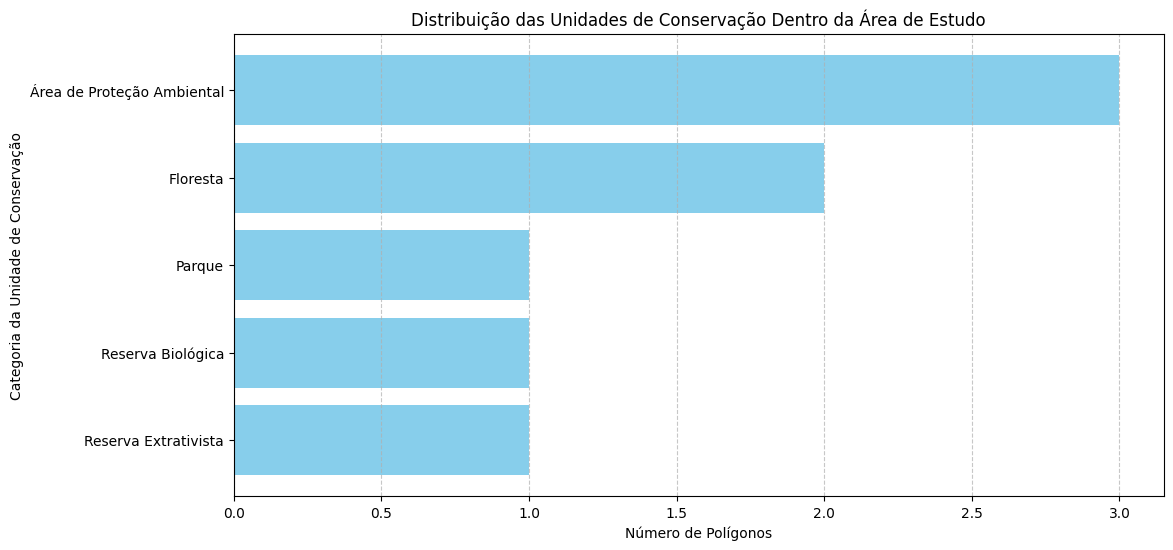

In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Consultar o número de polígonos por categoria
cur.execute("""
    SELECT c.categoria, COUNT(*)
    FROM conservation_units c, area_estudo a
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry)
    GROUP BY c.categoria
    ORDER BY COUNT(*) DESC;
""")

dados_categorias = cur.fetchall()

cur.close()
conn.close()

# Criar DataFrame para melhor visualização
df_categorias = pd.DataFrame(dados_categorias, columns=["Categoria", "Número de Polígonos"])

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(df_categorias["Categoria"], df_categorias["Número de Polígonos"], color='skyblue')
plt.xlabel("Número de Polígonos")
plt.ylabel("Categoria da Unidade de Conservação")
plt.title("Distribuição das Unidades de Conservação Dentro da Área de Estudo")
plt.gca().invert_yaxis()  # Inverter eixo para melhor visualização
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


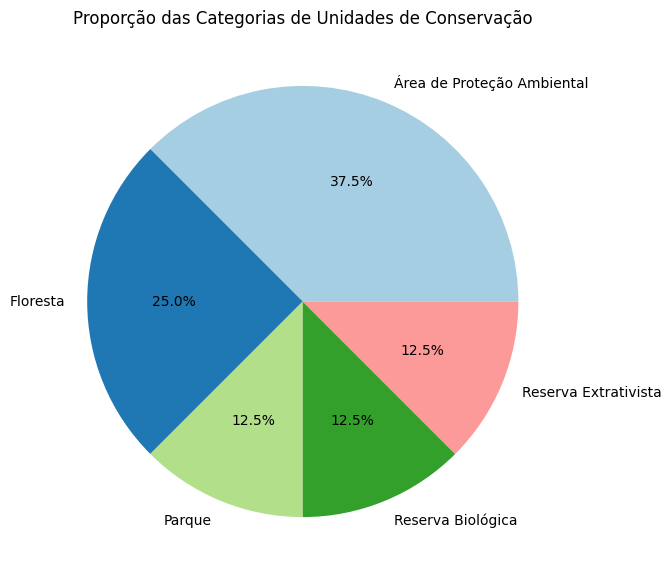

In [ ]:
# Criar um gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(df_categorias["Número de Polígonos"], labels=df_categorias["Categoria"], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proporção das Categorias de Unidades de Conservação")
plt.show()


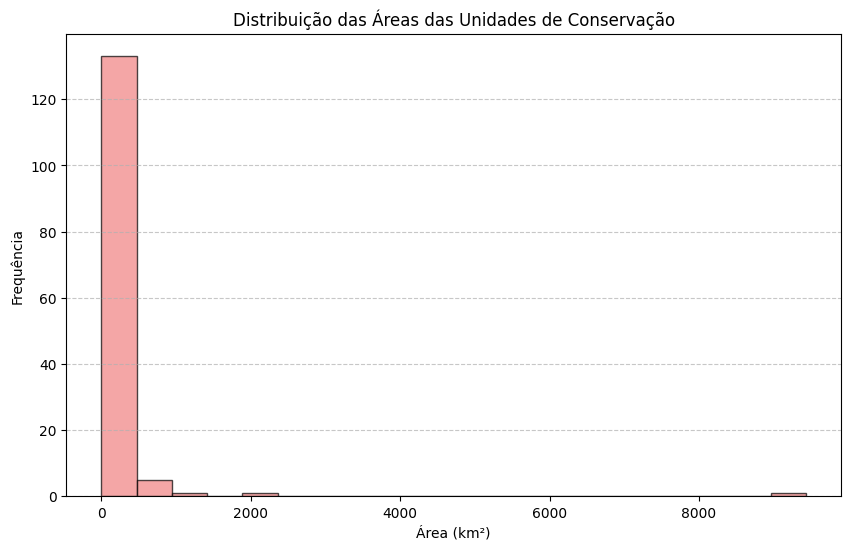

In [ ]:
# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Consultar as áreas individuais das unidades de conservação dentro da área de estudo
cur.execute("""
    SELECT ST_Area(ST_Transform(d.geom, 3857)) / 1000000 AS area_km2
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")

areas = [row[0] for row in cur.fetchall()]

cur.close()
conn.close()

# Criar um histograma da distribuição das áreas
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=20, color="lightcoral", edgecolor="black", alpha=0.7)
plt.xlabel("Área (km²)")
plt.ylabel("Frequência")
plt.title("Distribuição das Áreas das Unidades de Conservação")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
import psycopg2
import pandas as pd

# Conectar ao banco de dados
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Calcular a área total da área de estudo
cur.execute("""
    SELECT ST_Area(ST_Transform(wkb_geometry, 3857)) / 1000000
    FROM area_estudo;
""")
area_total_estudo = cur.fetchone()[0]

# Calcular a área total das unidades de conservação dentro da área de estudo
cur.execute("""
    SELECT SUM(ST_Area(ST_Transform(d.geom, 3857))) / 1000000
    FROM conservation_units c, area_estudo a,
    LATERAL ST_Dump(ST_Intersection(c.wkb_geometry, a.wkb_geometry)) AS d
    WHERE ST_Intersects(c.wkb_geometry, a.wkb_geometry);
""")
area_total_uc = cur.fetchone()[0]

cur.close()
conn.close()

# Calcular a porcentagem da área das unidades de conservação dentro da área de estudo
percentual_uc = (area_total_uc / area_total_estudo) * 100

# Criar um DataFrame para exibir os valores
df_percentual = pd.DataFrame([
    ["Área Total da Área de Estudo (km²)", area_total_estudo],
    ["Área Total das Unidades de Conservação (km²)", area_total_uc],
    ["Percentual de Unidades de Conservação na Área de Estudo (%)", percentual_uc]
], columns=["Métrica", "Valor"])

# Exibir a tabela no Pandas
df_percentual


,Métrica,Valor
0,Área Total da Área de Estudo (km²),60986.261394
1,Área Total das Unidades de Conservação (km²),19199.649413
2,Percentual de Unidades de Conservação na Área ...,31.481926


In [ ]:
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Listar todas as tabelas do banco de dados
cur.execute("""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public';
""")
tabelas = cur.fetchall()

# Listar os campos de cada tabela
estrutura_banco = {}
for tabela in tabelas:
    tabela_nome = tabela[0]
    cur.execute(f"""
        SELECT column_name, data_type
        FROM information_schema.columns
        WHERE table_name = '{tabela_nome}';
    """)
    estrutura_banco[tabela_nome] = cur.fetchall()

cur.close()
conn.close()

# Exibir a estrutura do banco de dados
estrutura_banco


{'geography_columns': [('coord_dimension', 'integer'),
  ('srid', 'integer'),
  ('type', 'text'),
  ('f_table_catalog', 'name'),
  ('f_geography_column', 'name'),
  ('f_table_schema', 'name'),
  ('f_table_name', 'name')],
 'geometry_columns': [('coord_dimension', 'integer'),
  ('srid', 'integer'),
  ('type', 'character varying'),
  ('f_table_catalog', 'character varying'),
  ('f_geometry_column', 'name'),
  ('f_table_schema', 'name'),
  ('f_table_name', 'name')],
 'spatial_ref_sys': [('srid', 'integer'),
  ('auth_srid', 'integer'),
  ('auth_name', 'character varying'),
  ('srtext', 'character varying'),
  ('proj4text', 'character varying')],
 'area_estudo': [('ogc_fid', 'integer'),
  ('id', 'numeric'),
  ('wkb_geometry', 'USER-DEFINED'),
  ('nome', 'character varying')],
 'conservation_units': [('ogc_fid', 'integer'),
  ('id', 'numeric'),
  ('wkb_geometry', 'USER-DEFINED'),
  ('categoria', 'character varying'),
  ('grupo', 'character varying'),
  ('esfera', 'character varying'),
  ('an

In [ ]:
import psycopg2
import pandas as pd

# Conectar ao banco de dados e obter a estrutura das tabelas
conn = psycopg2.connect("dbname=deltadb user=postgres password=postgres host=localhost")
cur = conn.cursor()

# Listar todas as tabelas do banco de dados
cur.execute("""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public';
""")
tabelas = cur.fetchall()

# Criar um dicionário para armazenar a estrutura do banco de dados
estrutura_banco = {}

# Listar os campos de cada tabela
for tabela in tabelas:
    tabela_nome = tabela[0]
    cur.execute(f"""
        SELECT column_name, data_type
        FROM information_schema.columns
        WHERE table_name = '{tabela_nome}';
    """)
    estrutura_banco[tabela_nome] = cur.fetchall()

cur.close()
conn.close()

# Criar um DataFrame para exibir a estrutura das tabelas
df_estrutura = []
for tabela, colunas in estrutura_banco.items():
    for coluna in colunas:
        df_estrutura.append([tabela, coluna[0], coluna[1]])

df_estrutura = pd.DataFrame(df_estrutura, columns=["Tabela", "Coluna", "Tipo de Dado"])

# Exibir a estrutura do banco de dados
df_estrutura


,Tabela,Coluna,Tipo de Dado
0,geography_columns,coord_dimension,integer
1,geography_columns,srid,integer
2,geography_columns,type,text
3,geography_columns,f_table_catalog,name
4,geography_columns,f_geography_column,name
5,geography_columns,f_table_schema,name
6,geography_columns,f_table_name,name
7,geometry_columns,coord_dimension,integer
8,geometry_columns,srid,integer
9,geometry_columns,type,character varying


Instalação do PostgreSQL e PostGIS no ambiente do Google Colab.
Criação do banco de dados deltadb e ativação da extensão PostGIS.
Conexão ao banco de dados usando psycopg2 e verificação da versão do PostgreSQL.
Criação da tabela area_estudo, contendo:
id (chave primária)
nome (nome da área de estudo)
geom (geometria do tipo MULTIPOLYGON, EPSG: 4326)
Importação do shapefile area_de_estudo.shp para a tabela area_estudo.
Correção da estrutura da tabela:
Ajuste do nome da coluna de geometria (wkb_geometry).
Inclusão da coluna nome.
Cálculo da área total da área de estudo: 60986.26 km².
Criação da tabela conservation_units para armazenar as Unidades de Conservação, contendo:
id (chave primária)
nome
categoria
grupo
esfera
ano_cria
wkb_geometry (geometria do tipo MULTIPOLYGON, EPSG: 4326)
Correção de erro na importação dos dados das Unidades de Conservação, pois inicialmente a geometria estava como POLYGON, sendo alterada para MULTIPOLYGON.
Importação dos dados das Unidades de Conservação (conservation_units_amazon_biome.shp) para a tabela conservation_units.
Contagem dos registros na tabela conservation_units: 304 registros.
Cálculo da interseção entre Unidades de Conservação e a área de estudo:
Número de polígonos que intersectam: 8
Área total dentro da área de estudo: 19199.65 km² (31.48% do total)
Exportação dos polígonos que intersectam a área de estudo como um novo shapefile unidades_conservacao_intersectadas.shp.